In [639]:
import pandas as pd
from plotnine import *
import numpy as np

In [640]:
df = pd.read_csv('out100', sep=' ', names=['file','it','LB','UB','Gap','FeasCut','OptCut','PartSize','time'])
df['nScen'] = df['file'].str.extract(r'dat_(\d*)_')
df['method'] = df['file'].str.extract(r'_([amps]).out')
df['instance'] = df['file'].str.extract(r'FLBD_(.*).dat')
det = df['file'].str.split('_', expand=True)
df['family']=det[1]
df['pNumber']=det[2]
df['config']=det[3].str.extract(r'(\d)')

In [641]:
df['time'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
907    False
908    False
909    False
910    False
911    False
Name: time, Length: 912, dtype: bool

In [642]:
#piv = df[df['time']<86400].pivot(index='instance', columns='method', values='time')
piv = df.pivot(index='instance', columns='method', values='time')

In [643]:
piv['aN'] = piv['a']/piv['s']
piv['mN'] = piv['m']/piv['s']
piv['pN'] = piv['p']/piv['s']
#piv['qN'] = piv['q']/piv['s']




<AxesSubplot:>

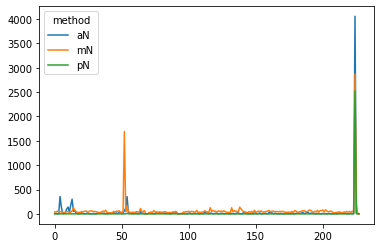

In [644]:
piv.reset_index()[['aN','mN','pN']].plot()

In [645]:
details = pd.read_csv('instanceParam.csv', sep=':', names=['file','detail'])
details['instance'] = details['file'].str.extract(r'(.*).dat')



In [646]:
piv = piv.merge(details, left_index=True, right_on='instance')

In [647]:
piv

,a,m,p,s,aN,mN,pN,file,detail,instance
0,4.133208,20.486479,0.523498,0.486730,8.491788,42.090027,1.075541,EJ_p10_1.dat,15 30,EJ_p10_1
1,4.433775,16.393428,0.575788,0.459564,9.647786,35.671698,1.252901,EJ_p10_2.dat,15 30,EJ_p10_2
2,0.737760,28.437346,0.452153,0.485662,1.519081,58.553780,0.931003,EJ_p10_3.dat,15 30,EJ_p10_3
3,1.316730,19.243959,0.538850,0.459010,2.868630,41.924923,1.173940,EJ_p10_4.dat,15 30,EJ_p10_4
4,365.686238,48.373095,1.711055,1.021703,357.918336,47.345554,1.674709,EJ_p11_1.dat,15 30,EJ_p11_1
...,...,...,...,...,...,...,...,...,...,...
223,4.428023,20.550936,0.760843,0.587961,7.531151,34.952890,1.294037,EJ_p8_4.dat,15 30,EJ_p8_4
224,71844.250468,50854.624793,44706.383649,17.712703,4056.086215,2871.082115,2523.972973,EJ_p9_1.dat,15 30,EJ_p9_1
225,2957.703306,28580.362404,740.997685,126.284590,23.420936,226.317102,5.867681,EJ_p9_2.dat,15 30,EJ_p9_2
226,26331.729321,5260.390583,60390.985378,9220.890897,2.855660,0.570486,6.549366,EJ_p9_3.dat,15 30,EJ_p9_3


In [648]:
indexSort = piv.sort_values('s')['instance']
piv2 = piv.reset_index()
piv2['instance'] = pd.Categorical(piv2['instance'], categories=indexSort)

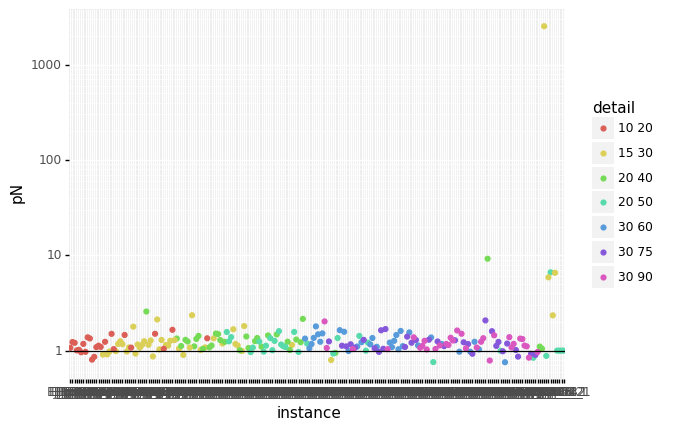

<ggplot: (327120773)>

In [649]:
ggplot(piv2, aes(x='instance', y='pN', color='detail'))+ geom_point() + scale_y_log10() + geom_hline(yintercept=1)

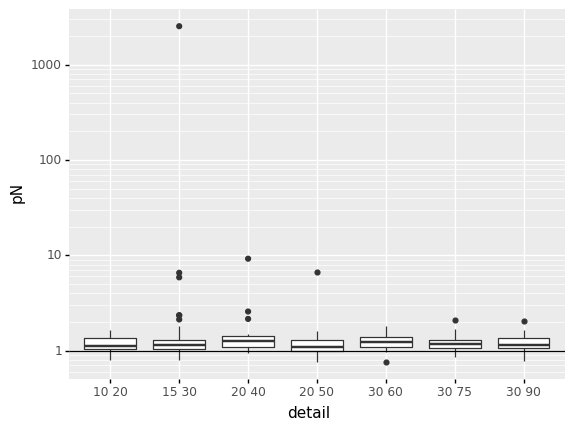

<ggplot: (326328805)>

In [650]:
ggplot(piv2, aes(x='detail',y='pN'))+ geom_boxplot() + scale_y_log10() + geom_hline(yintercept=1)

In [651]:
piv[['aN','mN','pN','instance']].melt(id_vars='instance')

,instance,variable,value
0,EJ_p10_1,aN,8.491788
1,EJ_p10_2,aN,9.647786
2,EJ_p10_3,aN,1.519081
3,EJ_p10_4,aN,2.868630
4,EJ_p11_1,aN,357.918336
...,...,...,...
679,EJ_p8_4,pN,1.294037
680,EJ_p9_1,pN,2523.972973
681,EJ_p9_2,pN,5.867681
682,EJ_p9_3,pN,6.549366


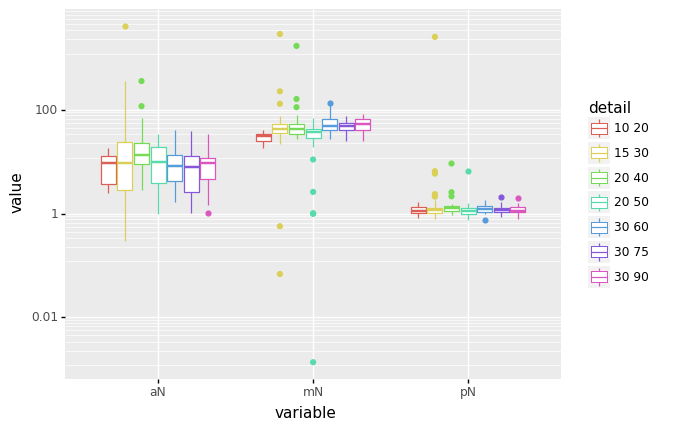

<ggplot: (323517404)>

In [652]:
ggplot(piv[['aN','mN','pN','instance','detail']].melt(id_vars=['instance','detail']),\
       aes(x='variable',y='value', color='detail'))\
    + geom_boxplot()\
    + scale_y_log10()

In [653]:
np.sum(piv['a']<86400)

224

In [654]:
(piv['a'].sort_values(ignore_index=True)).iloc[216]

365.686238

In [655]:
pprof = pd.DataFrame(index=range(len(piv)))
for col in ['a','p','m','s']:
    pprof[col]=(piv[col].sort_values(ignore_index=True))
    # Dejar solo 1 como 86400
    if np.sum(pprof[col]>=86400) > 0:
        idx = np.sum(pprof[col]<86400)
        pprof[col][pprof[col]>=86400] = np.nan
        pprof[col].iloc[idx] = 86400
        
pprof['perc'] = pprof.index/len(piv)

In [656]:
piv = df.pivot(index='instance', columns='method', values='time')

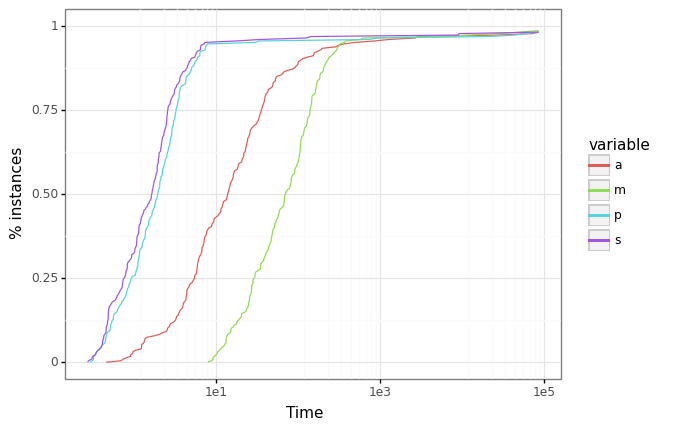

<ggplot: (322562021)>

In [657]:
tmp = pprof.melt(id_vars='perc').dropna()
tmp['value'] = tmp['value'].astype('float')
tmp['variable'] = tmp['variable'].astype('category')
ggplot(tmp, aes(x='value',y='perc',color='variable')) + geom_line() + scale_x_log10()\
+ xlab('Time') + ylab('% instances') + theme_bw() + ylim(0,1)

Check LB similares

In [658]:
tmp2 = (df.groupby('instance')['LB'].std())/(df.groupby('instance')['LB'].mean().abs())
tmp2.sort_values(ascending=False)

instance
EJ_p31_1    0.076205
EJ_p26_1    0.073405
EJ_p31_2    0.041419
EJ_p26_2    0.006062
EJ_p50_2    0.000128
              ...   
EJ_p29_2    0.000000
EJ_p29_3    0.000000
EJ_p29_4    0.000000
EJ_p2_1     0.000000
EJ_p9_4     0.000000
Name: LB, Length: 228, dtype: float64

In [659]:
tmp3 = df[df['time']<86400].groupby('instance')['LB'].agg(['max','min','mean']).reset_index()
tmp3['diff'] = (tmp3['max']-tmp3['min'])/np.abs(tmp3['mean'])

In [660]:
tmp3.sort_values('diff', ascending=False)

,instance,max,min,mean,diff
174,EJ_p50_2,147.84,147.802063,147.830516,2.566250e-04
184,EJ_p52_4,1014.73,1014.510445,1014.674419,2.163798e-04
53,EJ_p22_2,-130.73,-130.740000,-130.737500,7.648915e-05
188,EJ_p53_4,520.49,520.480819,520.487705,1.763923e-05
6,EJ_p11_3,-88.48,-88.480001,-88.480000,1.130199e-08
...,...,...,...,...,...
80,EJ_p29_3,264.94,264.940000,264.940000,0.000000e+00
81,EJ_p29_4,264.94,264.940000,264.940000,0.000000e+00
82,EJ_p2_1,155.99,155.990000,155.990000,0.000000e+00
83,EJ_p2_2,155.99,155.990000,155.990000,0.000000e+00


In [661]:
#df[df['instance']=='EJ_p1_4']
df[df['instance']=='EJ_p50_2']

,file,it,LB,UB,Gap,FeasCut,OptCut,PartSize,time,nScen,method,instance,family,pNumber,config
708,FLBD_EJ_p50_2.dat_100_a.out:FinalReport:,4,147.840000,147.840000,0.0,0,329,92,108.796885,100,a,EJ_p50_2,EJ,p50,2
709,FLBD_EJ_p50_2.dat_100_m.out:FinalReport:,1,147.840000,147.840000,0.0,0,1364,100,301.273522,100,m,EJ_p50_2,EJ,p50,2
710,FLBD_EJ_p50_2.dat_100_p.out:FinalReport:,3,147.802063,147.802063,0.0,0,15,89,5.025780,100,p,EJ_p50_2,EJ,p50,2
711,FLBD_EJ_p50_2.dat_100_s.out:FinalReport:,1,147.840000,147.840000,0.0,0,18,100,5.958075,100,s,EJ_p50_2,EJ,p50,2


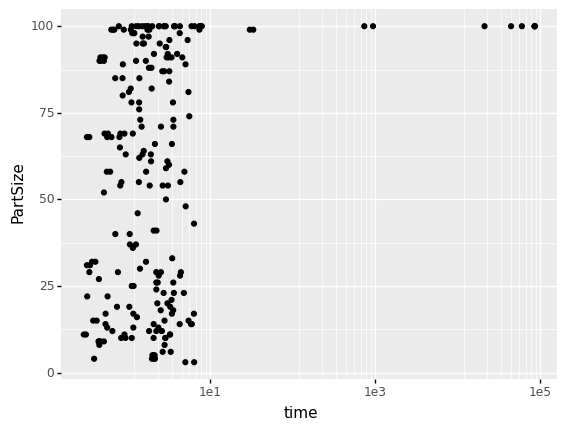

<ggplot: (322561796)>

In [662]:
ggplot(df[df['method']=='p'],aes(x='time',y='PartSize')) + geom_point() + scale_x_log10()

In [663]:
df2 = df.merge(details, on='instance')

In [664]:
df2

,file_x,it,LB,UB,Gap,FeasCut,OptCut,PartSize,time,nScen,method,instance,family,pNumber,config,file_y,detail
0,FLBD_EJ_p10_1.dat_100_a.out:FinalReport:,3,566.94,566.940000,0.000000,0,234,69,4.133208,100,a,EJ_p10_1,EJ,p10,1,EJ_p10_1.dat,15 30
1,FLBD_EJ_p10_1.dat_100_m.out:FinalReport:,1,566.94,566.940000,0.000000,0,700,100,20.486479,100,m,EJ_p10_1,EJ,p10,1,EJ_p10_1.dat,15 30
2,FLBD_EJ_p10_1.dat_100_p.out:FinalReport:,3,566.94,566.940000,0.000000,0,10,69,0.523498,100,p,EJ_p10_1,EJ,p10,1,EJ_p10_1.dat,15 30
3,FLBD_EJ_p10_1.dat_100_s.out:FinalReport:,1,566.94,566.940000,0.000000,0,7,100,0.486730,100,s,EJ_p10_1,EJ,p10,1,EJ_p10_1.dat,15 30
4,FLBD_EJ_p10_2.dat_100_a.out:FinalReport:,3,566.94,566.940000,0.000000,0,242,69,4.433775,100,a,EJ_p10_2,EJ,p10,2,EJ_p10_2.dat,15 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,FLBD_EJ_p9_3.dat_100_s.out:FinalReport:,1,-206.04,-206.042766,0.000013,0,3614,100,9220.890897,100,s,EJ_p9_3,EJ,p9,3,EJ_p9_3.dat,15 30
908,FLBD_EJ_p9_4.dat_100_a.out:FinalReport:,5,-206.04,-206.040000,0.000000,0,14431,100,2684.089876,100,a,EJ_p9_4,EJ,p9,4,EJ_p9_4.dat,15 30
909,FLBD_EJ_p9_4.dat_100_m.out:FinalReport:,1,-206.04,-206.052717,0.000062,0,9494,100,621.658787,100,m,EJ_p9_4,EJ,p9,4,EJ_p9_4.dat,15 30
910,FLBD_EJ_p9_4.dat_100_p.out:FinalReport:,6,-206.04,-206.048364,0.000041,0,4867,100,21276.065560,100,p,EJ_p9_4,EJ,p9,4,EJ_p9_4.dat,15 30


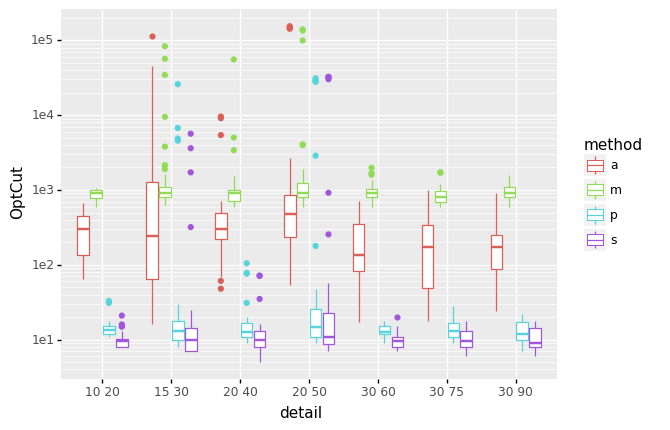

<ggplot: (320965301)>

In [665]:
ggplot(df2.dropna(), aes(x='detail', y='OptCut', color='method')) + geom_boxplot() + scale_y_log10()

In [666]:
df2['Optcut_per_sec'] = df2['OptCut']/df2['time']

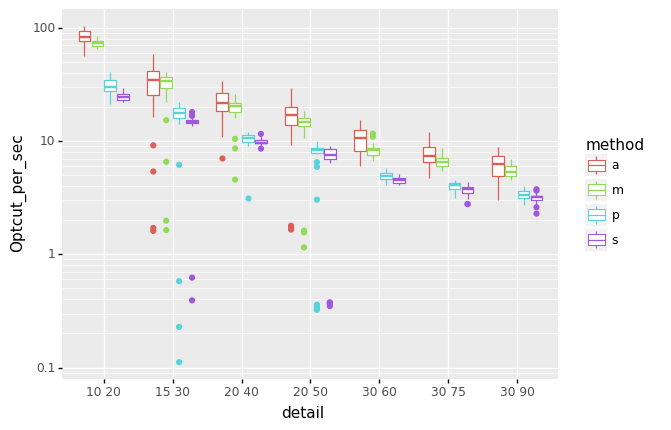

<ggplot: (319682030)>

In [667]:
ggplot(df2.dropna(), aes(x='detail', y='Optcut_per_sec', color='method')) + geom_boxplot() + scale_y_log10()

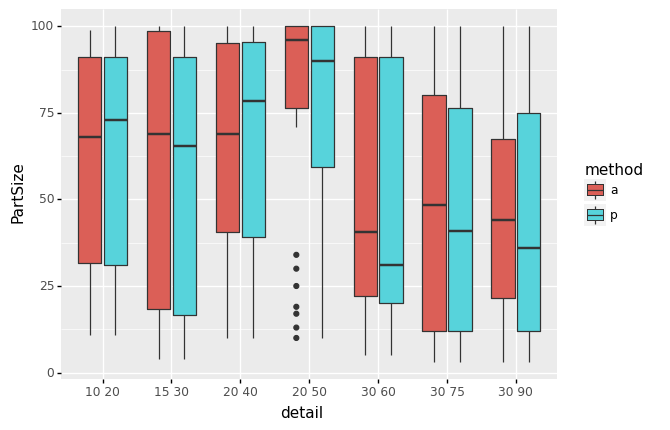

<ggplot: (326019542)>

In [668]:
ggplot(df2[df2['method'].isin(['p','a'])] ,aes(x='detail', y='PartSize', fill='method')) + geom_boxplot()

In [669]:
df[(df['instance'].isin(list(piv.loc[piv['pN']>1,'instance'])))&(df['method']=='p')].sort_values('time')

KeyError: 'pN'

In [ ]:
19/len(df['instance'].unique())

In [ ]:
piv[piv['pN']>1]['aN']